# Proyecto Control Óptimo: Deep Learning como problema de Control Óptimo

## Introducción

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA4703-1 Control Óptimo: Teoría y Laboratorio**  
**Profesor:** Héctor Ramírez C.   
**Auxiliares:** Joaquín Márquez & Sebastián P. Pincheira   
**Ayudante:** Fraick Reyes

**Integrantes:** David Felipe, Alonso Urbina

### Importar liberías y código necesario
___

In [ ]:
import sys, os
import matplotlib.pyplot as plt
import time
import torch

sys.path.append(os.path.abspath("../src"))

from data import *
from activations import *
from model import ResNetEuler
from train import *

In [2]:
FIG_PATH = "../figures/"

### Primero experimentos
___

#### Dataset: Espirales

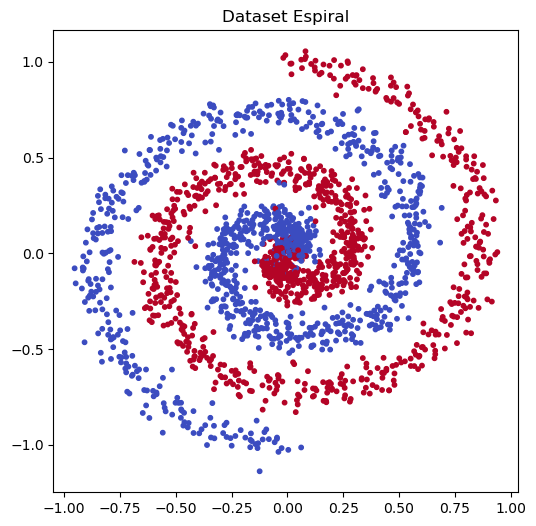

Iniciando entrenamiento con 1000 épocas...
[0001] loss=0.120250 | acc_tr=60.50% | L=0.0625 | acc_val=58.50%
[0010] loss=0.117784 | acc_tr=60.19% | L=0.0625 | acc_val=58.75%
[0020] loss=0.117545 | acc_tr=60.06% | L=0.0625 | acc_val=58.75%
[0030] loss=0.115412 | acc_tr=59.06% | L=0.0625 | acc_val=54.50%
[0040] loss=0.113217 | acc_tr=61.69% | L=0.0625 | acc_val=58.00%
[0050] loss=0.107539 | acc_tr=53.94% | L=0.0625 | acc_val=51.25%
[0060] loss=0.101845 | acc_tr=63.94% | L=0.0625 | acc_val=60.25%
[0070] loss=0.088507 | acc_tr=74.81% | L=0.125 | acc_val=72.00%
[0080] loss=0.077600 | acc_tr=75.38% | L=0.125 | acc_val=72.50%
[0090] loss=0.069634 | acc_tr=80.50% | L=0.125 | acc_val=78.25%
[0100] loss=0.064915 | acc_tr=84.00% | L=0.5 | acc_val=82.75%
[0110] loss=0.056319 | acc_tr=85.62% | L=0.25 | acc_val=83.25%
[0120] loss=0.053758 | acc_tr=87.06% | L=0.5 | acc_val=85.00%
[0130] loss=0.049732 | acc_tr=88.38% | L=0.25 | acc_val=86.00%
[0140] loss=0.047666 | acc_tr=88.88% | L=0.25 | acc_val=87.2

In [3]:
device = "cpu"
torch.manual_seed(0)

X, y = make_spiral(n_per_class=1000, turns=1.75, noise=0.05, device=device)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), cmap="coolwarm", s=10)
plt.title("Dataset Espiral")
plt.savefig(FIG_PATH + "spiral_dataset.pdf")
plt.show()

n = X.size(0)
n_tr = int(0.8 * n)
X_tr_sp, y_tr_sp = X[:n_tr], y[:n_tr]
X_va_sp, y_va_sp = X[n_tr:], y[n_tr:]

dim = 2
num_layers = 50
epochs = 1000
batch_size = 64
verbose_every = 10
modelspiral = ResNetEuler(
    dim=dim,
    num_layers=num_layers,
    activation=tanh,
    activation_derivative=tanh_derivative,
    hip_function=sigmoid,  # C(z)
    hip_function_derivative=sigmoid_derivative,
    delta_t=0.1,
).to(device)

t0 = time.perf_counter()
train_model_backtracking(
    modelspiral,
    X_tr_sp,
    y_tr_sp,
    X_val=X_va_sp,
    y_val=y_va_sp,
    epochs=epochs,
    L_init=1.0,
    rho=0.5,
    rbar=2.0,
    verbose_every=verbose_every,
)
t1 = time.perf_counter()
train_time_spiral = t1 - t0

Accuracy final (train): 0.9693750143051147
Accuracy final (val):   0.9599999785423279
Tiempo de entrenamiento (espiral): 191.47 segundos


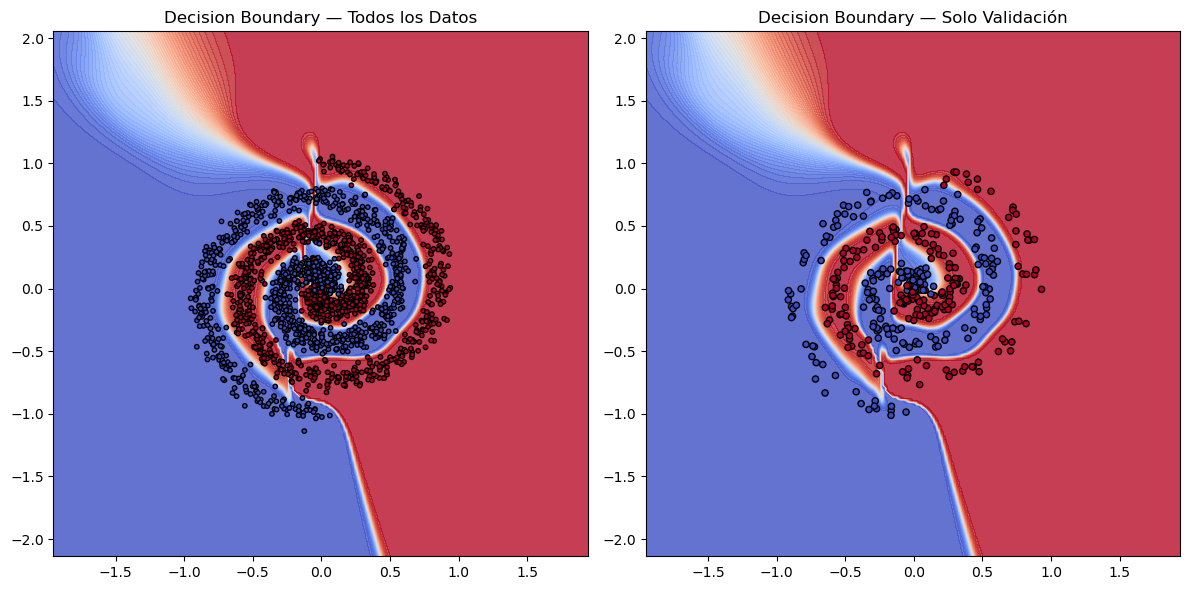

In [4]:
print("Accuracy final (train):", accuracy(modelspiral, X_tr_sp, y_tr_sp))
print("Accuracy final (val):  ", accuracy(modelspiral, X_va_sp, y_va_sp))
print(f"Tiempo de entrenamiento (espiral): {train_time_spiral:.2f} segundos")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes[0]
xx, yy = torch.meshgrid(
    torch.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200, device=device),
    torch.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200, device=device),
    indexing="ij",
)
grid = torch.stack([xx.ravel(), yy.ravel()], dim=1)

with torch.no_grad():
    probs = modelspiral(grid).cpu().view(xx.size())

ax.contourf(xx.cpu(), yy.cpu(), probs, levels=50, cmap="coolwarm", alpha=0.8)
ax.scatter(
    X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), cmap="coolwarm", edgecolor="k", s=10
)
ax.set_title("Decision Boundary — Todos los Datos")


ax = axes[1]
ax.contourf(xx.cpu(), yy.cpu(), probs, levels=50, cmap="coolwarm", alpha=0.8)
ax.scatter(
    X_va_sp[:, 0].cpu(),
    X_va_sp[:, 1].cpu(),
    c=y_va_sp.cpu(),
    cmap="coolwarm",
    edgecolor="k",
    s=20,
)
ax.set_title("Decision Boundary — Solo Validación")
plt.tight_layout()
plt.savefig(FIG_PATH + "decision_boundary_spiral.pdf")
plt.show()

#### Dataset: Donut

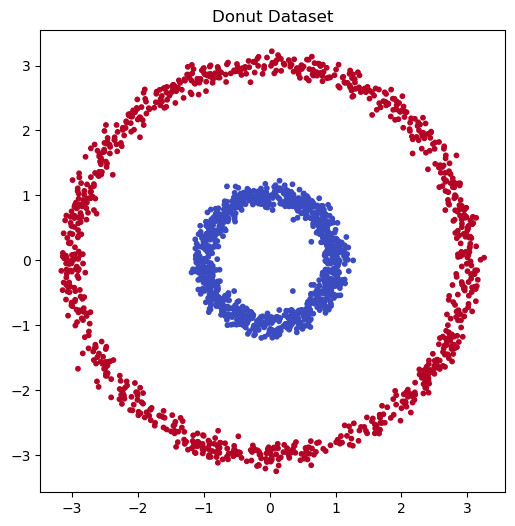

Iniciando entrenamiento con 1000 épocas...
[0001] loss=0.129837 | acc_tr=53.37% | L=0.0625 | acc_val=53.75%
[0010] loss=0.009941 | acc_tr=97.75% | L=0.01562 | acc_val=98.50%
[0020] loss=0.010269 | acc_tr=97.87% | L=0.125 | acc_val=97.00%
Early stopping at epoch 24, loss=0.000095


In [5]:
device = "cpu"
torch.manual_seed(0)

X, y = make_donut(n_per_class=1000, r_inner=1.0, r_outer=3.0, noise=0.1, device=device)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), cmap="coolwarm", s=10)
plt.title("Donut Dataset")
plt.savefig(FIG_PATH + "donut_dataset.pdf")
plt.show()

n = X.size(0)
n_tr = int(0.8 * n)
X_tr_dn, y_tr_dn = X[:n_tr], y[:n_tr]
X_va_dn, y_va_dn = X[n_tr:], y[n_tr:]

dim = 2
num_layers = 50
epochs = 1000
batch_size = 64
verbose_every = 10

modeldonut = ResNetEuler(
    dim=dim,
    num_layers=num_layers,
    activation=tanh,
    activation_derivative=tanh_derivative,
    hip_function=sigmoid,
    hip_function_derivative=sigmoid_derivative,
    delta_t=0.1,
).to(device)

t0 = time.perf_counter()
train_model_backtracking(
    modeldonut,
    X_tr_dn,
    y_tr_dn,
    X_val=X_va_dn,
    y_val=y_va_dn,
    epochs=epochs,
    L_init=1.0,
    rho=0.5,
    rbar=2.0,
    verbose_every=verbose_every,
)
t1 = time.perf_counter()
train_time_donut = t1 - t0

Accuracy final (train): 0.9950000047683716
Accuracy final (val):   0.9950000047683716


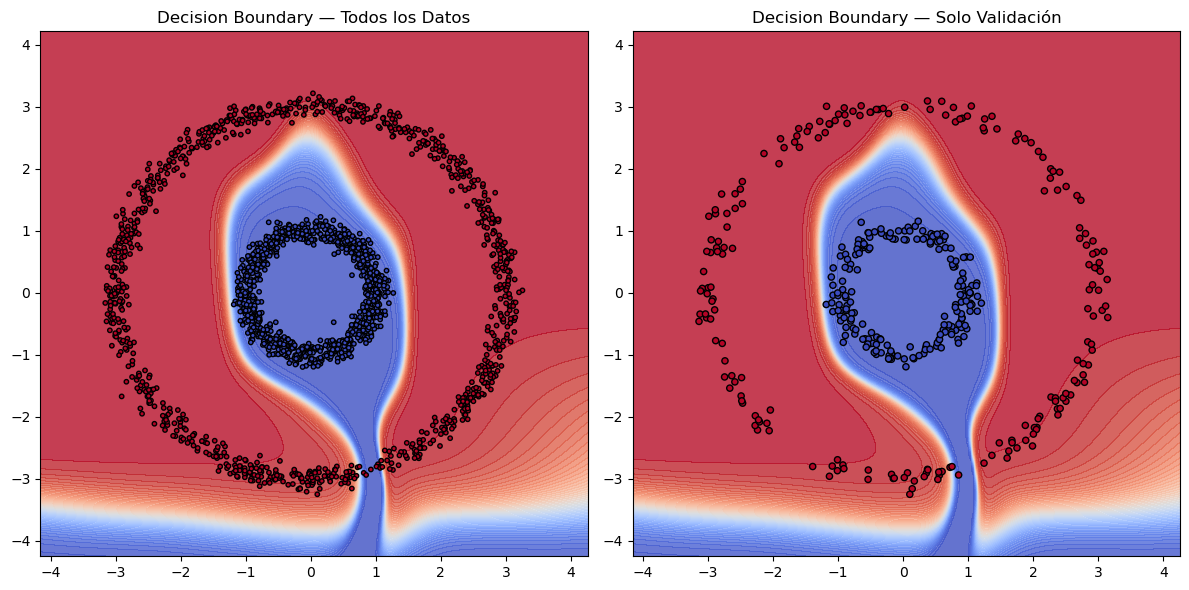

In [6]:
print("Accuracy final (train):", accuracy(modeldonut, X_tr_dn, y_tr_dn))
print("Accuracy final (val):  ", accuracy(modeldonut, X_va_dn, y_va_dn))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes[0]
xx, yy = torch.meshgrid(
    torch.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200, device=device),
    torch.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200, device=device),
    indexing="ij",
)
grid = torch.stack([xx.ravel(), yy.ravel()], dim=1)

with torch.no_grad():
    probs = modeldonut(grid).cpu().view(xx.size())

ax.contourf(xx.cpu(), yy.cpu(), probs, levels=50, cmap="coolwarm", alpha=0.8)
ax.scatter(
    X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), cmap="coolwarm", edgecolor="k", s=10
)
ax.set_title("Decision Boundary — Todos los Datos")


ax = axes[1]
ax.contourf(xx.cpu(), yy.cpu(), probs, levels=50, cmap="coolwarm", alpha=0.8)
ax.scatter(
    X_va_dn[:, 0].cpu(),
    X_va_dn[:, 1].cpu(),
    c=y_va_dn.cpu(),
    cmap="coolwarm",
    edgecolor="k",
    s=20,
)
ax.set_title("Decision Boundary — Solo Validación")
plt.tight_layout()
plt.savefig(FIG_PATH + "decision_boundary_donut.pdf")
plt.show()

#### Dataset: Lineal

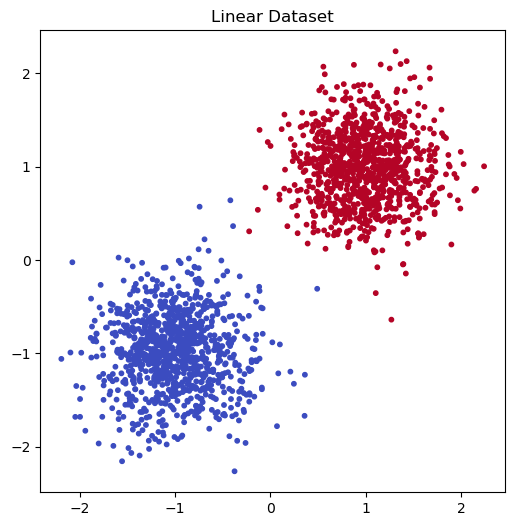

Iniciando entrenamiento con 10000 épocas...
Early stopping at epoch 1, loss=0.000083


In [7]:
device = "cpu"
torch.manual_seed(0)

X, y = make_linear_dataset(n_per_class=1000, device=device)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), cmap="coolwarm", s=10)
plt.title("Linear Dataset")
plt.savefig(FIG_PATH + "linear_dataset.pdf")
plt.show()

n = X.size(0)
n_tr = int(0.8 * n)
X_tr_ln, y_tr_ln = X[:n_tr], y[:n_tr]
X_va_ln, y_va_ln = X[n_tr:], y[n_tr:]

dim = 2
num_layers = 50
epochs = 10000
batch_size = 64
verbose_every = 10

modellinear = ResNetEuler(
    dim=dim,
    num_layers=num_layers,
    activation=relu,
    activation_derivative=relu_prime,
    hip_function=sigmoid,
    hip_function_derivative=sigmoid_derivative,
    delta_t=0.1,
).to(device)

t0 = time.perf_counter()
train_model_backtracking(
    modellinear,
    X_tr_ln,
    y_tr_ln,
    X_val=X_va_ln,
    y_val=y_va_ln,
    epochs=epochs,
    L_init=1.0,
    rho=0.5,
    rbar=2.0,
    verbose_every=verbose_every,
)
t1 = time.perf_counter()
train_time_linear = t1 - t0

Accuracy final (train): 0.9981250166893005
Accuracy final (val):   1.0


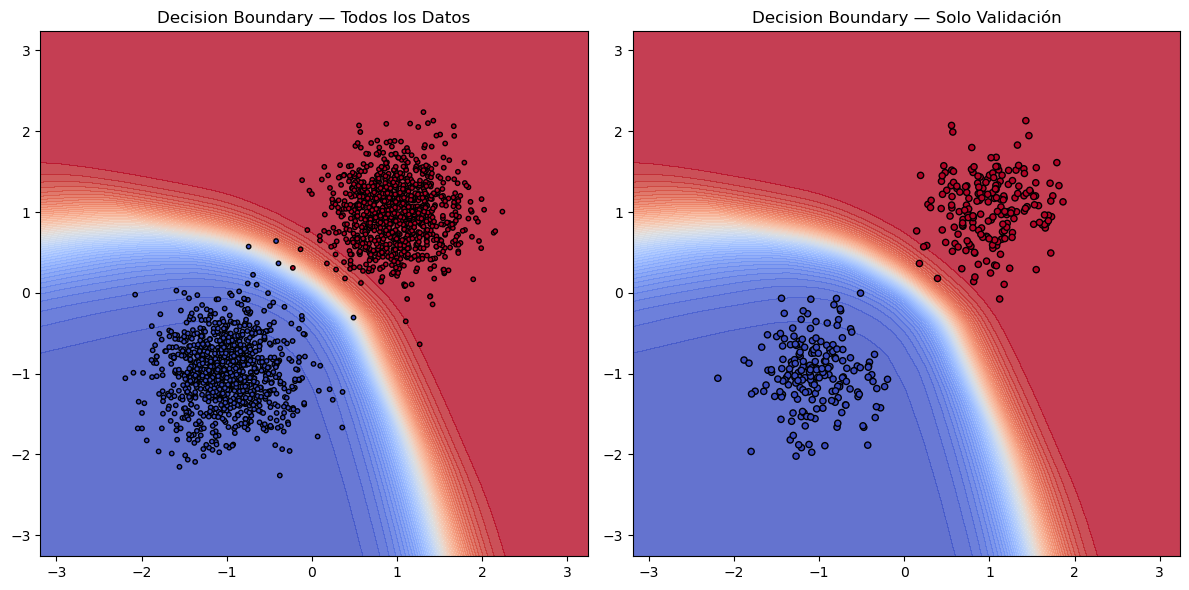

In [8]:
print("Accuracy final (train):", accuracy(modellinear, X_tr_ln, y_tr_ln))
print("Accuracy final (val):  ", accuracy(modellinear, X_va_ln, y_va_ln))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes[0]
xx, yy = torch.meshgrid(
    torch.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200, device=device),
    torch.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200, device=device),
    indexing="ij",
)
grid = torch.stack([xx.ravel(), yy.ravel()], dim=1)

with torch.no_grad():
    probs = modellinear(grid).cpu().view(xx.size())

ax.contourf(xx.cpu(), yy.cpu(), probs, levels=50, cmap="coolwarm", alpha=0.8)
ax.scatter(
    X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), cmap="coolwarm", edgecolor="k", s=10
)
ax.set_title("Decision Boundary — Todos los Datos")


ax = axes[1]
ax.contourf(xx.cpu(), yy.cpu(), probs, levels=50, cmap="coolwarm", alpha=0.8)
ax.scatter(
    X_va_ln[:, 0].cpu(),
    X_va_ln[:, 1].cpu(),
    c=y_va_ln.cpu(),
    cmap="coolwarm",
    edgecolor="k",
    s=20,
)
ax.set_title("Decision Boundary — Solo Validación")
plt.tight_layout()
plt.savefig(FIG_PATH + "decision_boundary_linear.pdf")
plt.show()

#### Dataset: Esferas anidadas

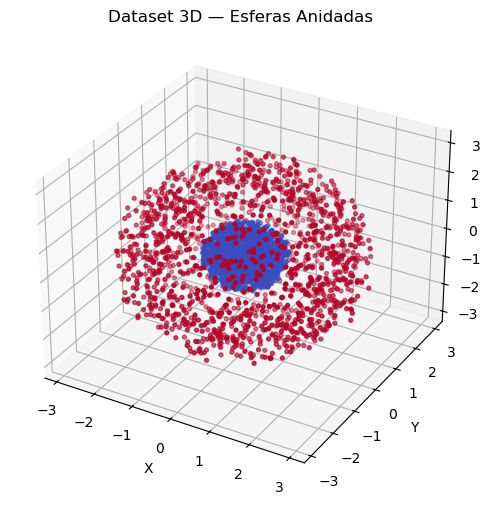

Iniciando entrenamiento con 3000 épocas...
[0001] loss=0.118250 | acc_tr=83.38% | L=0.0625 | acc_val=82.50%
Early stopping at epoch 13, loss=0.000067
Accuracy final (train): 0.9900000095367432
Accuracy final (val):   0.9766666889190674


In [9]:
device = "cpu"
torch.manual_seed(0)

X, y = make_3d_nested_spheres(n_per_class=1500, device=device)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0].cpu(), X[:, 1].cpu(), X[:, 2].cpu(), c=y.cpu(), cmap="coolwarm", s=8)
ax.set_title("Dataset 3D — Esferas Anidadas")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig(FIG_PATH + "3d_nested_spheres_dataset.pdf")
plt.show()

perm = torch.randperm(X.size(0), device=device)
X = X[perm]
y = y[perm]

n = X.size(0)
n_tr = int(0.8 * n)
X_tr_sph, y_tr_sph = X[:n_tr], y[:n_tr]
X_va_sph, y_va_sph = X[n_tr:], y[n_tr:]

dim = 3
num_layers = 80
epochs = 3000
batch_size = 64
verbose_every = 20

model3d = ResNetEuler(
    dim=dim,
    num_layers=num_layers,
    activation=tanh,
    activation_derivative=tanh_derivative,
    hip_function=sigmoid,  # C(z)
    hip_function_derivative=sigmoid_derivative,
    delta_t=0.1,
).to(device)

t0 = time.perf_counter()
train_model_backtracking(
    model3d,
    X_tr_sph,
    y_tr_sph,
    X_val=X_va_sph,
    y_val=y_va_sph,
    epochs=epochs,
    L_init=1.0,
    rho=0.5,
    rbar=2.0,
    verbose_every=verbose_every,
)
t1 = time.perf_counter()
train_time_3d = t1 - t0
print("Accuracy final (train):", accuracy(model3d, X_tr_sph, y_tr_sph))
print("Accuracy final (val):  ", accuracy(model3d, X_va_sph, y_va_sph))

#### Dataset: Doble hélice

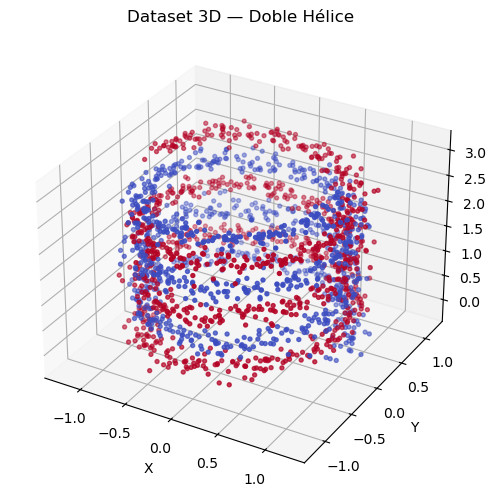

Iniciando entrenamiento con 500 épocas...
[0001] loss=0.127779 | acc_tr=49.38% | L=0.25 | acc_val=53.50%
[0020] loss=0.125648 | acc_tr=50.88% | L=0.0625 | acc_val=46.50%
[0040] loss=0.125203 | acc_tr=51.88% | L=0.01562 | acc_val=49.50%
[0060] loss=0.116570 | acc_tr=57.00% | L=0.0625 | acc_val=54.25%
[0080] loss=0.092833 | acc_tr=69.25% | L=0.125 | acc_val=70.25%
[0100] loss=0.061887 | acc_tr=82.56% | L=0.5 | acc_val=84.00%
[0120] loss=0.042931 | acc_tr=92.00% | L=0.5 | acc_val=93.25%
[0140] loss=0.033482 | acc_tr=93.00% | L=0.5 | acc_val=94.50%
[0160] loss=0.026821 | acc_tr=94.19% | L=1 | acc_val=95.50%
[0180] loss=0.021887 | acc_tr=95.19% | L=0.5 | acc_val=96.75%
[0200] loss=0.020604 | acc_tr=96.06% | L=0.25 | acc_val=98.25%
[0220] loss=0.017140 | acc_tr=96.50% | L=0.25 | acc_val=97.75%
[0240] loss=0.014123 | acc_tr=97.06% | L=0.5 | acc_val=98.00%
[0260] loss=0.011650 | acc_tr=97.75% | L=0.5 | acc_val=96.25%
[0280] loss=0.009563 | acc_tr=98.12% | L=1 | acc_val=97.00%
[0300] loss=0.007

In [10]:
device = "cpu"
torch.manual_seed(0)

X, y = make_3d_double_helix(
    n_per_class=1000,
    turns=3.0,
    noise=0.08,
    device=device,
)
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0].cpu(), X[:, 1].cpu(), X[:, 2].cpu(), c=y.cpu(), cmap="coolwarm", s=8)
ax.set_title("Dataset 3D — Doble Hélice")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.savefig(FIG_PATH + "3d_double_helix_dataset.pdf")
plt.show()

perm = torch.randperm(X.size(0), device=device)
X = X[perm]
y = y[perm]

n = X.size(0)
n_tr = int(0.8 * n)
X_tr_dh, y_tr_dh = X[:n_tr], y[:n_tr]
X_va_dh, y_va_dh = X[n_tr:], y[n_tr:]

dim = 3
num_layers = 80
epochs = 500
batch_size = 64
verbose_every = 20

model_spiral3d = ResNetEuler(
    dim=dim,
    num_layers=num_layers,
    activation=tanh,
    activation_derivative=tanh_derivative,
    hip_function=sigmoid,
    hip_function_derivative=sigmoid_derivative,
    delta_t=0.1,
).to(device)

t0 = time.perf_counter()
train_model_backtracking(
    model_spiral3d,
    X_tr_dh,
    y_tr_dh,
    X_val=X_va_dh,
    y_val=y_va_dh,
    epochs=epochs,
    L_init=1.0,
    rho=0.5,
    rbar=2.0,
    verbose_every=verbose_every,
    batch_size=batch_size,
)
t1 = time.perf_counter()
train_time_spiral3d = t1 - t0

print("Accuracy final (train 3D helix):", accuracy(model_spiral3d, X_tr_dh, y_tr_dh))
print("Accuracy final (val 3D helix):  ", accuracy(model_spiral3d, X_va_dh, y_va_dh))

___